# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.118755e+01     7.837650e+00
 * time: 0.0042459964752197266
     1     2.994072e+01     5.251826e+00
 * time: 0.016154050827026367
     2     2.912216e+01     1.125902e+01
 * time: 0.03541707992553711
     3     1.411490e+01     2.042777e+00
 * time: 0.058300018310546875
     4     1.263653e+01     1.068468e+00
 * time: 0.0773930549621582
     5     1.230173e+01     1.999154e+00
 * time: 0.09262609481811523
     6     1.151210e+01     1.557572e+00
 * time: 0.10787320137023926
     7     1.086535e+01     9.180613e-01
 * time: 0.12325716018676758
     8     1.014052e+01     9.677255e-01
 * time: 0.13866019248962402
     9     9.728803e+00     7.913126e-01
 * time: 0.1539750099182129
    10     9.539503e+00     7.500168e-01
 * time: 0.16928505897521973
    11     9.413948e+00     8.229267e-01
 * time: 0.18448901176452637
    12     9.337275e+00     4.802128e-01
 * time: 0.19597601890563965
    13     9.224582e+00     5.254420e-01
 * tim

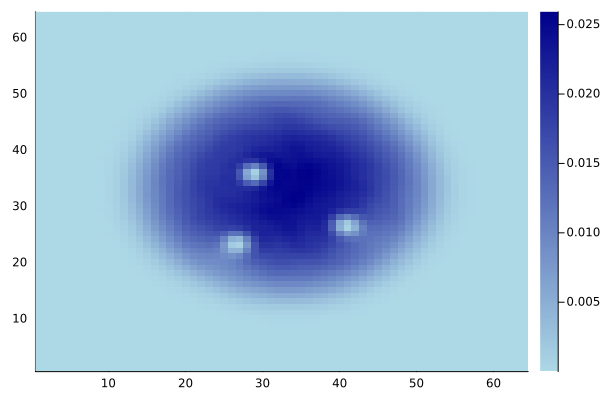

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)